# Robi Datathon 2.0: Pre-Assessment

### About the dataset
In this pre-assessment round, the task is to predict the label column based on the given features. The dataset contains both categorical and continuous values. Here, the column id is the unique identifier and the rest columns are the features.

### File description:
- train.csv : contains the training features along with the id and label column
- test.csv : this is the testing dataset. You will be predicting the label column for this dataset. You will need the idand your predicted label (0 or 1) column for the submission.
- sample_submission.csv : a sample submission format, containing 100 rows.


### Here are some necessary dependencies to install

In [1]:
# Uncomment these to install
'''
!pip install opendatasets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install mplcyberpunk
!pip install sklearn
!pip install xgboost lightgbm catboost
'''


'\n!pip install opendatasets\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install plotly\n!pip install mplcyberpunk\n!pip install sklearn\n!pip install xgboost lightgbm catboost\n'

In [2]:
# Necessary librairies to import

import opendatasets as od
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import plotly.express as px
import seaborn as sns
import mplcyberpunk
plt.style.use('cyberpunk')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

### Importing datasets

In [3]:
dataset = "https://www.kaggle.com/competitions/robi-datathon-2-pre-assessment/data"

In [4]:
od.download(dataset)

Skipping, found downloaded files in "./robi-datathon-2-pre-assessment" (use force=True to force download)


In [5]:
data_dir = './robi-datathon-2-pre-assessment'

In [6]:
os.listdir(data_dir)

['sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
train = pd.read_csv('robi-datathon-2-pre-assessment/train.csv')
test = pd.read_csv('robi-datathon-2-pre-assessment/test.csv')

## Exploring the datasets

In [8]:
print('Number of rows and columns:',train.shape) 


Number of rows and columns: (28322, 36)


In [9]:
print(test.shape) 
#print(test.dtypes)

(85065, 35)


In [10]:
train.nunique()

id        28322
gender        2
s11           2
s12           2
s13           2
s16           4
s17           4
s18           4
s48           2
s52           4
s53           2
s54           9
s55           9
s56           0
s57           0
s58           2
s59           0
s69           4
s70           4
s71           4
n1        28321
n2        28320
n3           10
n4        28321
n5        28290
n6        28299
n7        28320
n8        28321
n9        28321
n10       28319
n11       28321
n12           2
n13           2
n14       28322
n15           7
label         2
dtype: int64

In [11]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TRAIN SET MISSING VALUES:
id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

TEST SET MISSING VALUES:
id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       77322
s55       75644
s56       85065
s57       85065
s58           0
s59       85065
s69           0
s70           0
s71           0
n1            0
n2            0
n3     

In [12]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


### Some actions regarding data cleaning
Some columns almost have no significant data and are not correlated with any variables. Those columns are cleaned.

In [13]:
train_detail = train.drop(columns=['s53', 's54', 's55', 's56', 's57', 's58', 's59'])

In [14]:
train_detail = train_detail.drop(columns=['n11', 'n12', 'n13', 'n14', 'n15'])

In [15]:
train_detail.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n2,n3,n4,n5,n6,n7,n8,n9,n10,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,0


In [16]:
for i in train_detail.columns:
    print(i)
    print(train_detail[i].unique())

id
["b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg=='"
 "b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8FvkVcSUl2AquMfWqtOqs3AQYGxS13wQv9Tx4GEkPEl5RnbchazqsZcw=='"
 "b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS9EYdw6Wo8Y5agbzfD6hhsaXZCBdrUQVPpZBXYsODc2PDjER2DX5QcA=='"
 ...
 "b'gAAAAABinOicscC37w1W9uiIlYL1U5D_mUtmgdUg8QTlgTDiCQj0N8l5xVuD5tTmGrYgogJLq-v9Z6fCyGeAng__ulkRJQi-Xg=='"
 "b'gAAAAABinOib-JZ8iQDxjSRsa1dPT1TqeSQ_si4mAw5fX_kDmvIAkIofJCd_35viYIE5AhMTE-MYsS5yYkiD_9J6ewDjL1cYuQ=='"
 "b'gAAAAABinOiZ3mCQAtoJFXj-Ymjhi9FbbZ_Ypi5gDoAEYe1Cx66GhkhZ5UIJNLcPlgrRyfpabvIwD5ok1GxipWfkujjwXyMMBw=='"]
gender
['M' 'F']
s11
['Y' 'N']
s12
['N' 'Y']
s13
[1 0]
s16
['D' 'B' 'C' 'A']
s17
['D' 'C' 'B' 'A']
s18
['B' 'D' 'C' 'A']
s48
[0 1]
s52
['1' 'l' '0' 'o']
s69
['x' '~1' 'C`' '0']
s70
['op: D' 'op: C' 'op: B' 'op: A']
s71
['b' 'd' 'c' 'a']
n1
[16.14466597  7.14455819  6.92323603 ... 13.42979701 16.09462206
  7.05810713]
n2
[1.98944148 0.8448659  1.04

### Several columns have irregular data. Some categorical data are under curation

In [17]:
train_detail['s11'].replace(['N', 'Y'],
                        [0, 1], inplace=True)
train_detail['s12'].replace(['N', 'Y'],
                        [0, 1], inplace=True)
train_detail['s16'].replace(['A', 'B', 'C', 'D'],
                        [1, 2, 3, 4], inplace=True)
train_detail['s17'].replace(['A', 'B', 'C', 'D'],
                        [1, 2, 3, 4], inplace=True)
train_detail['s18'].replace(['A', 'B', 'C', 'D'],
                        [1, 2, 3, 4], inplace=True)
train_detail['s52'].replace(['1', 'l', '0', 'o'],
                        [1, 1, 0, 0], inplace=True)
#train_detail['s53'].replace([' ', '  '],
#                        [0, 1], inplace=True)
#train_detail['s58'].replace(['B', 'A'],
#                        [0, 1], inplace=True)
train_detail['s69'].replace(['~1', 'C`', 'x', '0'],
                        [1, 1, 0, 0], inplace=True)
train_detail['s70'].replace(['op: A', 'op: B', 'op: C', 'op: D'],
                        [1, 2, 3, 4], inplace=True)
train_detail['s71'].replace(['a', 'b', 'c', 'd'],
                        [1, 2, 3, 4], inplace=True)


### Correlation graph to get a better picture after cleaning the data

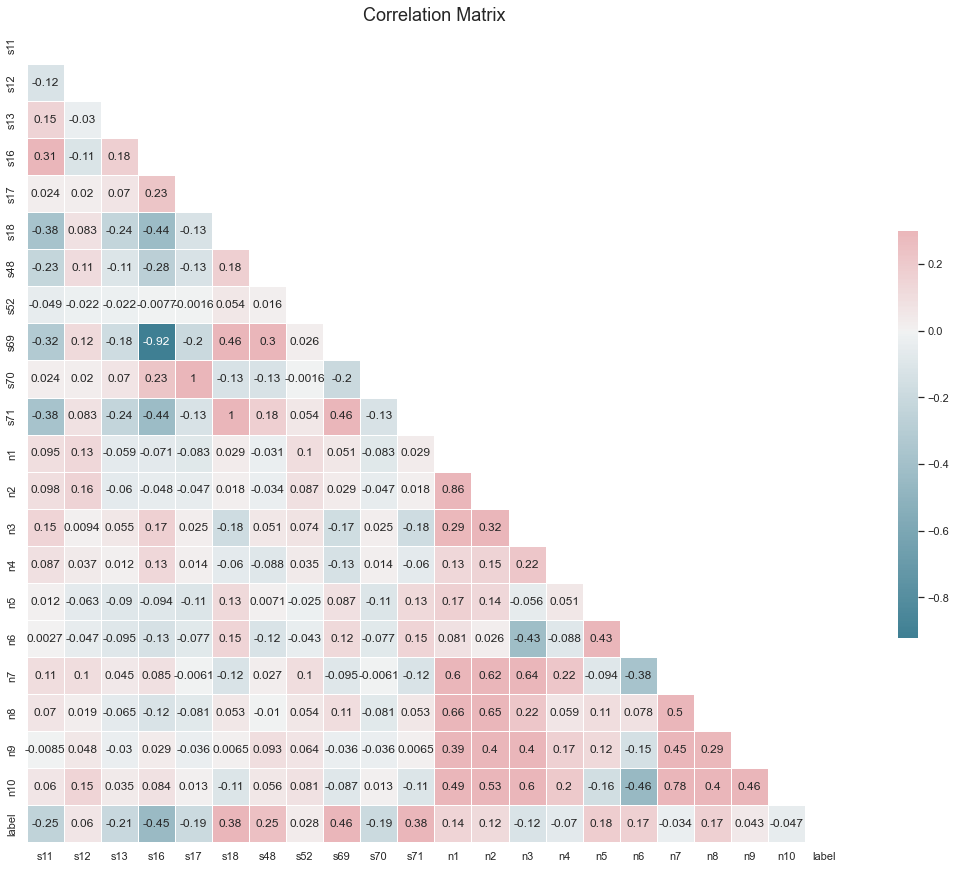

In [18]:
sns.set(style="white")

corr = train_detail.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Data modeling, cross validation and ensembling prediction

In [19]:
X = train_detail.drop(columns=['id', 'gender', 'label'], axis=1)
y = train_detail['label']

In [20]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: label, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

# classification function to use commonly for several machine learning algorithms

def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

### Some common machine learning algorithms like logistic regression, decision tree, random forest, extra trees, extreme gradient boosting, light gradient boosting and catboost are being checked for application on test data.

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8779833356870499
CV Score: 0.8728904625488054


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.8128795367885892
CV Score: 0.8131841057439626


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.880525349526903
CV Score: 0.8761033466971841


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.8810902414913148
CV Score: 0.8742321644950408


In [26]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8772772207315351
CV Score: 0.8716193135069636


In [27]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state = 0)
classify(model)

Accuracy: 0.883208586357859
CV Score: 0.8762446083344553


In [28]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False, random_state=0)
classify(model)

Accuracy: 0.8816551334557265
CV Score: 0.8767036354161991


## After a lot of failed trials of tuning parameters of different algorithms, light gradient boosting classifier method stood above others and so this method will be used to train and test.


The main features of the LGBM model are as follows :

- Higher accuracy and a faster training speed.

- Low memory utilization

- Comparatively better accuracy than other boosting algorithms and handles overfitting much better while working with smaller datasets.

- Parallel Learning support.

- Compatible with both small and large datasets

LGBMClassifier is a gradient boosting framework that makes use of tree based learning algorithms that is considered to be a very powerful algorithm when it comes to computation. It is considered to be a fast processing algorithm.

While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise. LightGBM chooses the leaf with large loss to grow. It can lower down more loss than a level wise algorithm when growing the same leaf.

LightGBM is not for a small volume of datasets. It can easily overfit small data due to its sensitivity. It can be used for data having more than 10,000+ rows. Our data has over 25,000 rows.After several trials, tuning hyperparameters seemed quite problematic and therefore was avoided not to face overfitting.

In [29]:
X = train_detail.drop(columns=['id', 'gender', 'label'], axis=1)
y = train_detail['label']
model = LGBMClassifier()
model.fit(X, y)

LGBMClassifier()

In [30]:
# test data is being curated 

test_detail = test.drop(columns=['s53', 's54', 's55', 's56', 's57', 's58', 's59'])
test_detail = test_detail.drop(columns=['n11', 'n12', 'n13', 'n14', 'n15'])
    
test_detail['s11'].replace(['N', 'Y'],
                        [0, 1], inplace=True)
test_detail['s12'].replace(['N', 'Y'],
                        [0, 1], inplace=True)
test_detail['s16'].replace(['A', 'B', 'C', 'D'],
                        [1, 2, 3, 4], inplace=True)
test_detail['s17'].replace(['A', 'B', 'C', 'D'],
                        [1, 2, 3, 4], inplace=True)
test_detail['s18'].replace(['A', 'B', 'C', 'D'],
                        [1, 2, 3, 4], inplace=True)
test_detail['s52'].replace(['1', 'l', '0', 'o'],
                        [1, 1, 0, 0], inplace=True)
test_detail['s69'].replace(['~1', 'C`', 'x', '0'],
                        [1, 1, 0, 0], inplace=True)
test_detail['s70'].replace(['op: A', 'op: B', 'op: C', 'op: D'],
                        [1, 2, 3, 4], inplace=True)
test_detail['s71'].replace(['a', 'b', 'c', 'd'],
                        [1, 2, 3, 4], inplace=True)
                        
X_test = test_detail.drop(columns=['id', 'gender'], axis=1)




In [31]:
pred = model.predict(X_test)
pred

array([1, 1, 1, ..., 0, 1, 0])

In [32]:
test_id = test_detail['id']
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'id':test_id,'label':pred})

In [33]:
submission.to_csv('Submission_Enigma_6f57li.csv',index=False)

The score turned out to be 0.71735.

## Thanks for your kind attention